# Lab | Random variable distributions

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

### *Get the numerical variables from our dataset.

In [24]:
num = data._get_numeric_data()

num.isna().sum()

Customer Lifetime Value          0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
dtype: int64

### *Check using a distribution plot if the variables fit the theoretical normal or exponential distribution

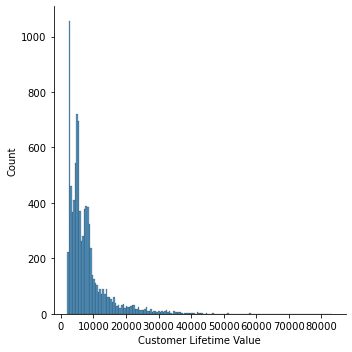

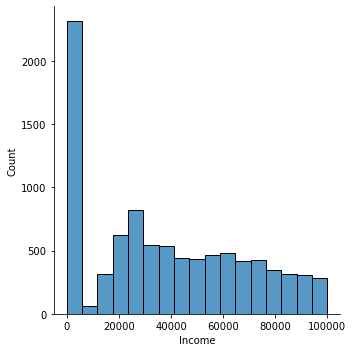

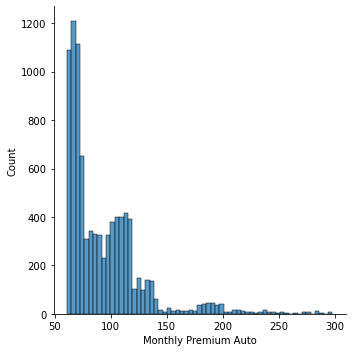

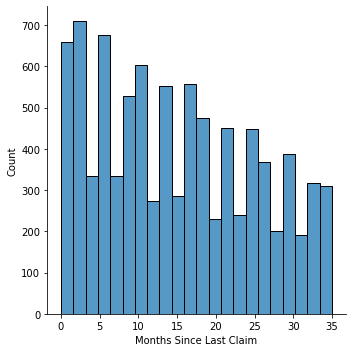

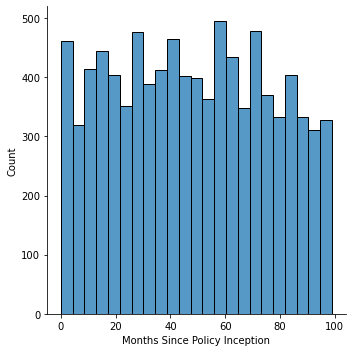

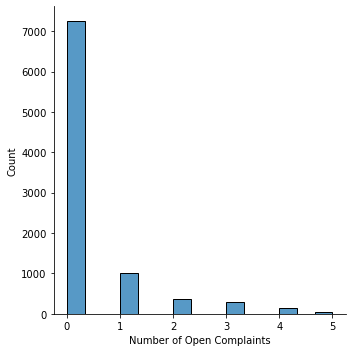

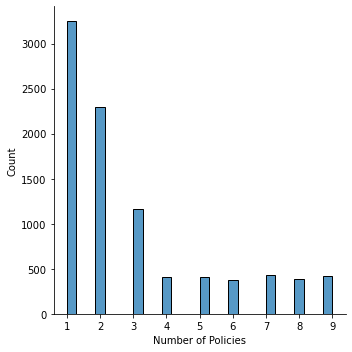

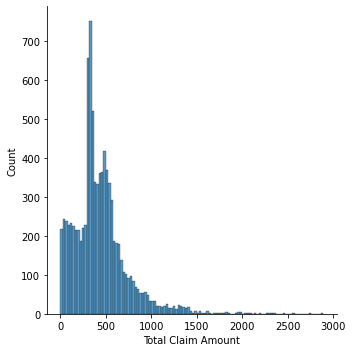

In [16]:
for column in num.columns:
    sns.displot(num[column])
    plt.show()

### *Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result

In [26]:
def log_transformer(x):
    if np.isfinite(x) and x != 0:
        x = np.log(x)
        return x
    else:
        x = 0
        return x

log_transformed = []
for feature in num.columns:
    log_trans = num[feature].apply(lambda x: log_transformer(x))
    log_transformed.append(log_trans)

numerical_data_log_transformed = pd.DataFrame(log_transformed).T
numerical_data_log_transformed

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,0.000000,0.000000,5.952753
1,8.850738,0.000000,4.543295,2.564949,3.737670,0.000000,2.079442,7.031268
2,9.464008,10.794809,4.682131,2.890372,3.637586,0.000000,0.693147,6.339428
3,8.941920,0.000000,4.663439,2.890372,4.174387,0.000000,1.945910,6.272653
4,7.942253,10.688211,4.290459,2.484907,3.784190,0.000000,0.000000,4.928202
...,...,...,...,...,...,...,...,...
9129,10.060747,11.183602,4.290459,2.890372,4.488636,0.000000,0.693147,5.289452
9130,8.038031,9.980634,4.369448,2.639057,3.332205,0.000000,0.000000,5.938064
9131,9.007476,0.000000,4.442651,2.197225,3.610918,1.098612,0.693147,6.673026
9132,8.925912,9.996112,4.564348,3.526361,1.098612,0.000000,1.098612,6.538429


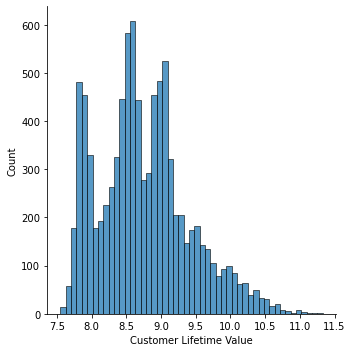

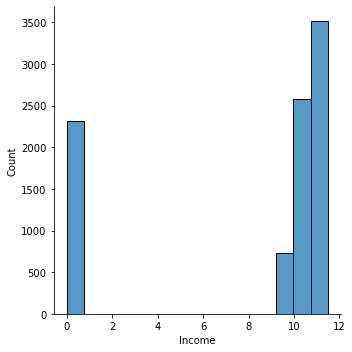

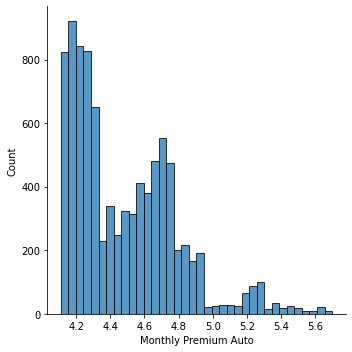

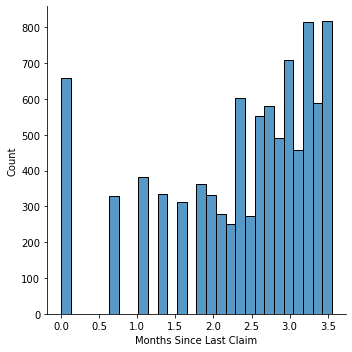

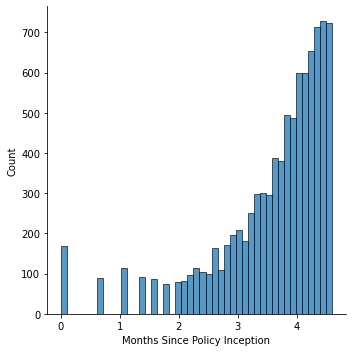

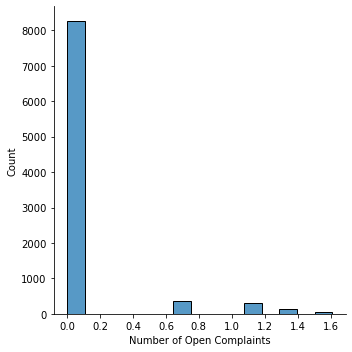

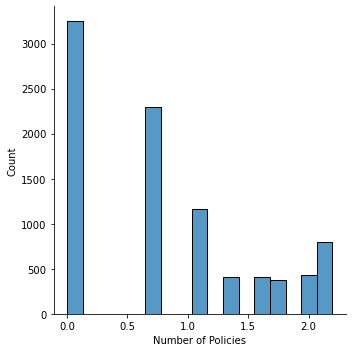

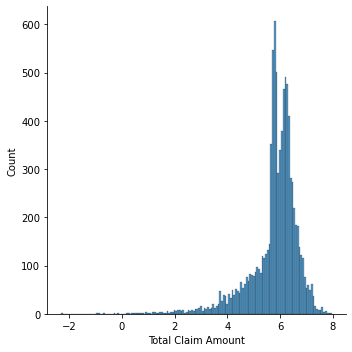

In [27]:
for column in numerical_data_log_transformed.columns:
    sns.displot(numerical_data_log_transformed[column])
    plt.show()

### trying the minmax scaler

In [28]:
from sklearn.preprocessing import MinMaxScaler
num_normalized = pd.DataFrame(MinMaxScaler().fit_transform(num), columns=num.columns)



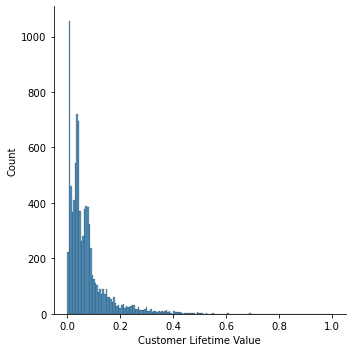

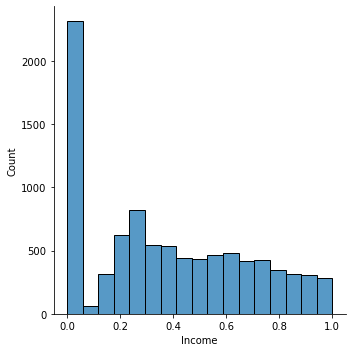

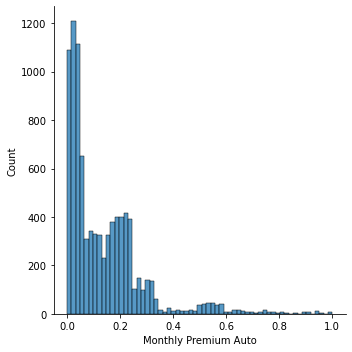

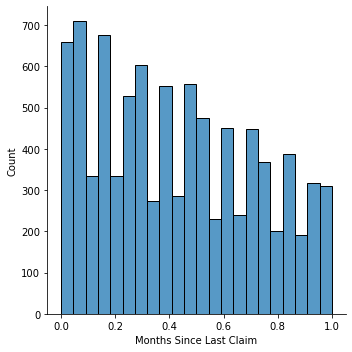

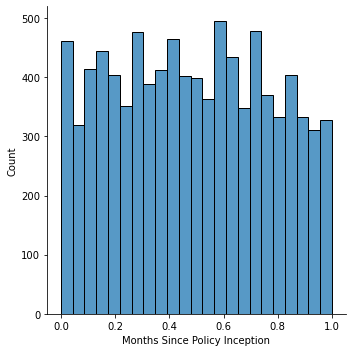

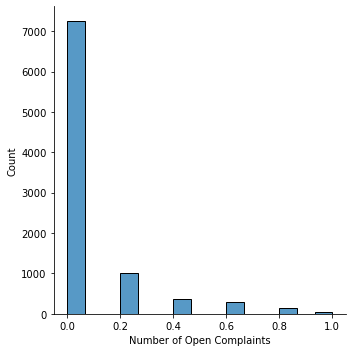

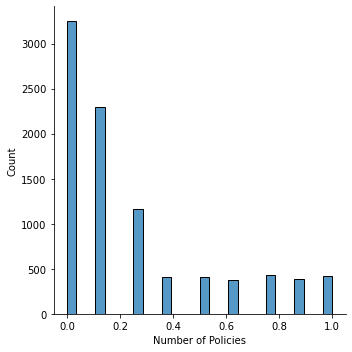

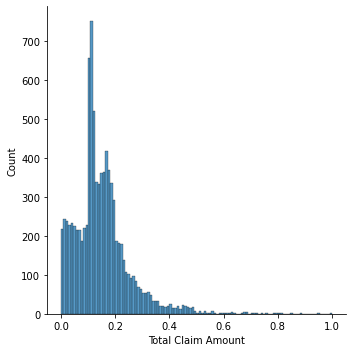

In [31]:
for column in num_normalized.columns:
    sns.displot(num_normalized[column])
    plt.show()

In [ ]:
# i get other outcomes with both scaling methods. But i like the outcome better with the log_transform for this dataset.